# Life Expectancy Data Analysis
This notebook provides an analysis of the "Life Expectancy Data" dataset, including data cleaning, visualization, and outlier treatment.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import multiprocessing as mp

# Display plots inline
%matplotlib inline

## Load and Inspect the Dataset
We load the dataset and inspect its first and last few rows, shape, and information about its structure.


In [2]:
# Load the dataset
df = pd.read_csv('Life Expectancy Data.csv')

# Display first 10 rows
print(df.head(10))

# Display last 10 rows
print(df.tail(10))

# Shape of the dataset
print(f'Shape of the dataset: {df.shape}')

# Information about the dataset
print(df.info())

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   
5  Afghanistan  2010  Developing              58.8            279.0   
6  Afghanistan  2009  Developing              58.6            281.0   
7  Afghanistan  2008  Developing              58.1            287.0   
8  Afghanistan  2007  Developing              57.5            295.0   
9  Afghanistan  2006  Developing              57.3            295.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582       

## Check for Missing Values and Duplicates
We check for missing values and duplicate rows in the dataset.


In [3]:
# Check for missing values
print(df.isnull().sum())

# Percentage of missing values
print(df.isnull().sum() / df.shape[0] * 100)

# Check for duplicate values
print(f'Number of duplicate rows: {df.duplicated().sum()}')

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV or AIDS                         0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64
Country                             0.000000
Year                                0.000000
Status                              0.0

## Identify Garbage Values in Object Columns
We examine the unique values in object-type columns to identify any garbage values.


In [4]:
# Identify garbage values in object columns
for col in df.select_dtypes(include=['object']).columns:
    print(df[col].value_counts())
    print("***" * 10)

Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: count, Length: 193, dtype: int64
******************************
Status
Developing    2426
Developed      512
Name: count, dtype: int64
******************************


## Descriptive Statistics
We provide descriptive statistics for numerical and categorical columns.


In [5]:
# Descriptive statistics for numerical columns
print(df.describe().T)

# Descriptive statistics for categorical columns
print(df.describe(include='object'))


                                  count          mean           std  \
Year                             2938.0  2.007519e+03  4.613841e+00   
Life expectancy                  2928.0  6.922493e+01  9.523867e+00   
Adult Mortality                  2928.0  1.647964e+02  1.242921e+02   
infant deaths                    2938.0  3.030395e+01  1.179265e+02   
Alcohol                          2744.0  4.602861e+00  4.052413e+00   
percentage expenditure           2938.0  7.382513e+02  1.987915e+03   
Hepatitis B                      2385.0  8.094046e+01  2.507002e+01   
Measles                          2938.0  2.419592e+03  1.146727e+04   
 BMI                             2904.0  3.832125e+01  2.004403e+01   
under-five deaths                2938.0  4.203574e+01  1.604455e+02   
Polio                            2919.0  8.255019e+01  2.342805e+01   
Total expenditure                2712.0  5.938190e+00  2.498320e+00   
Diphtheria                       2919.0  8.232408e+01  2.371691e+01   
 HIV o

## Data Visualization
We visualize the distribution of numerical columns using histograms and identify outliers with boxplots.


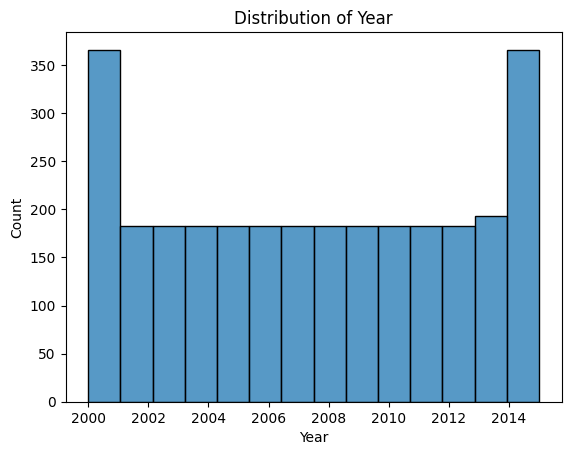

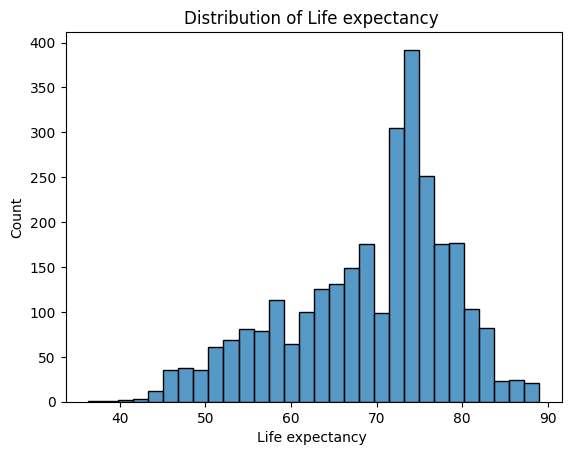

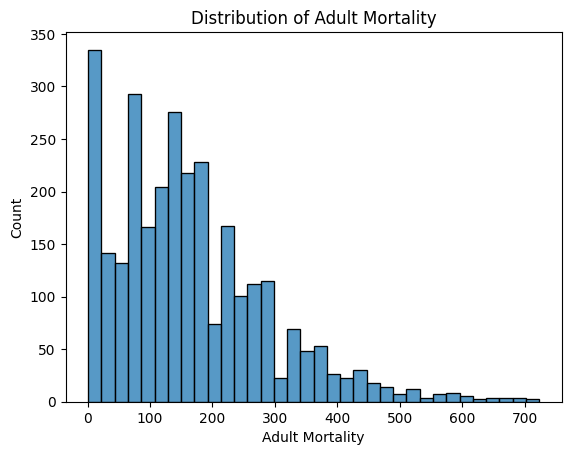

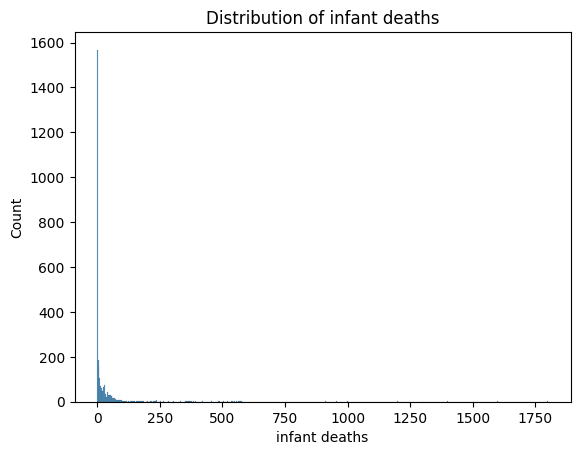

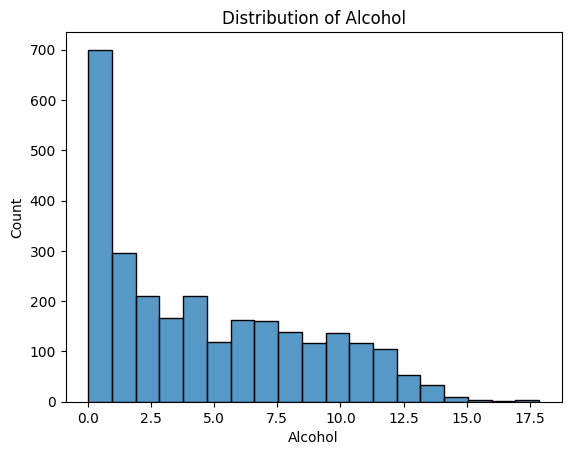

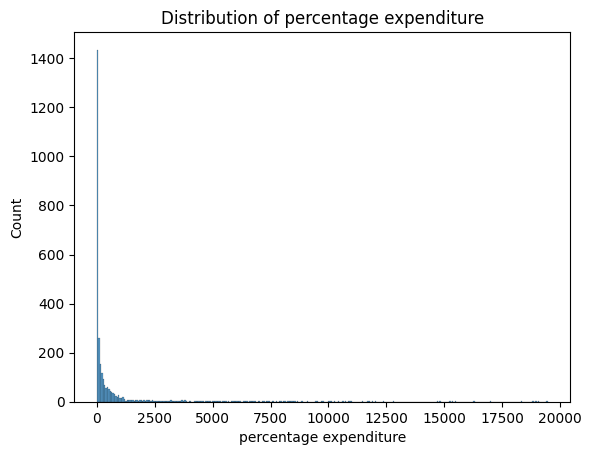

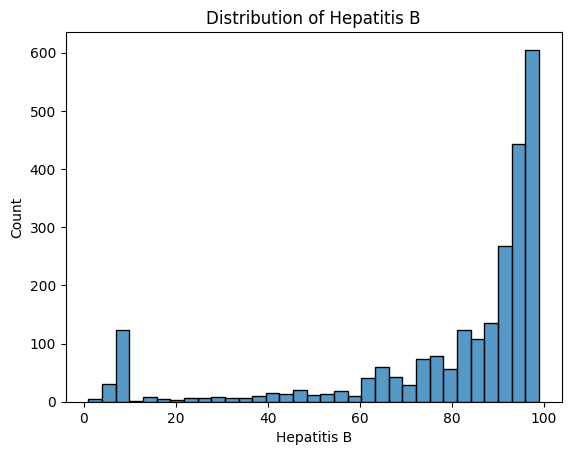

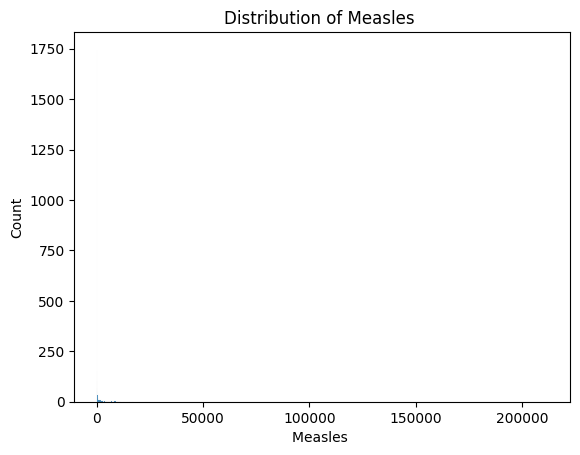

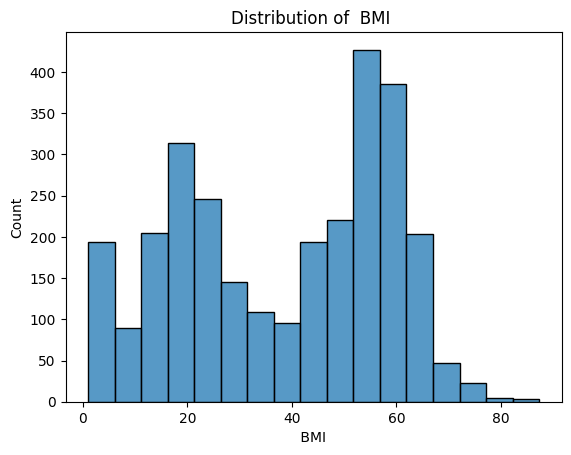

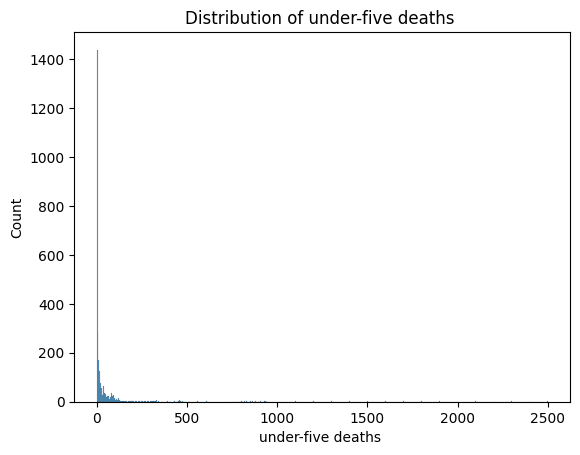

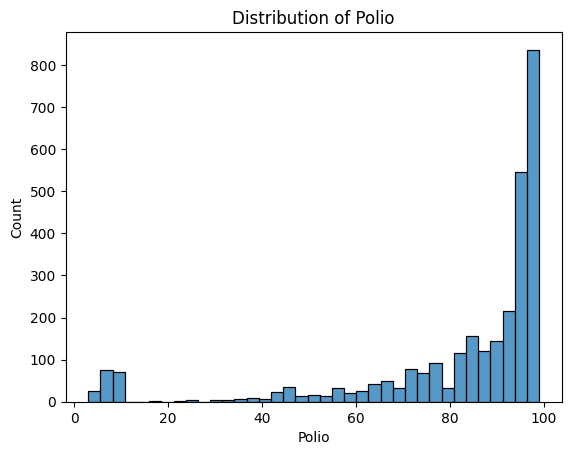

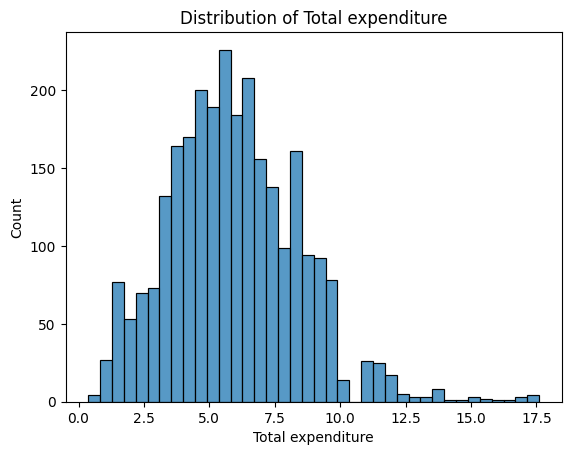

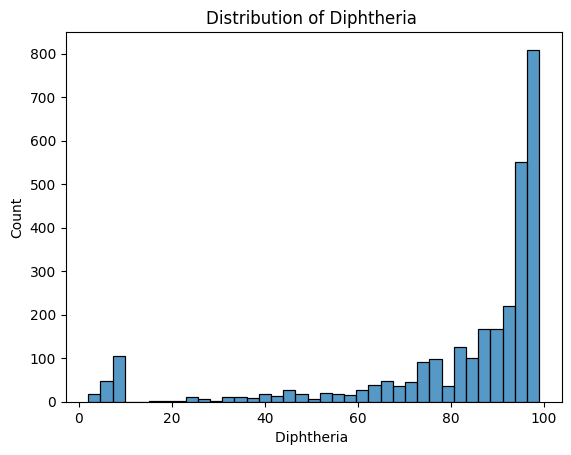

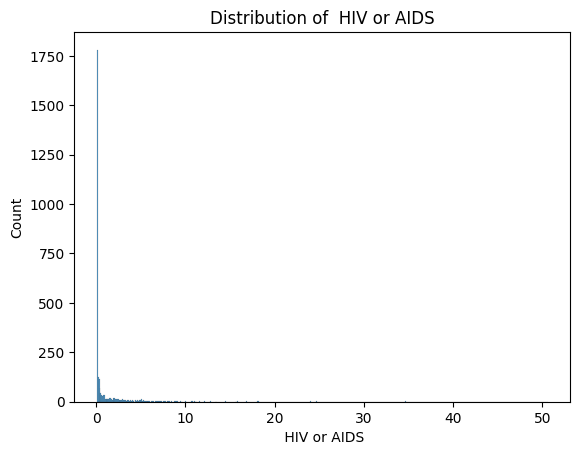

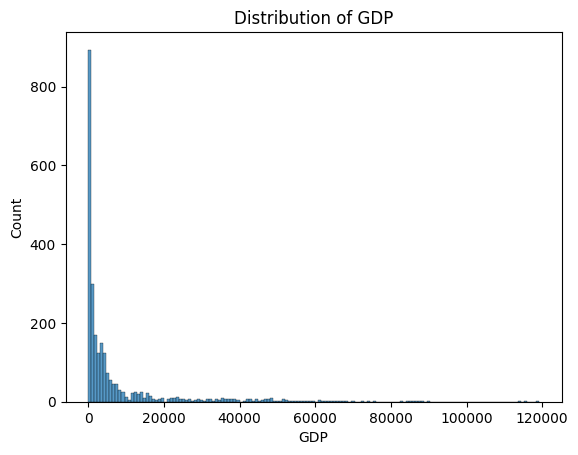

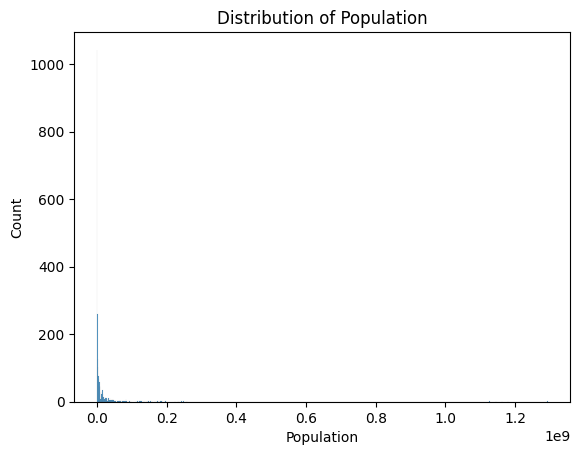

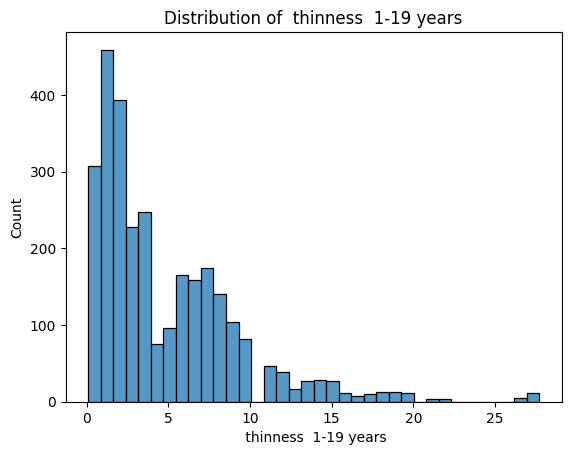

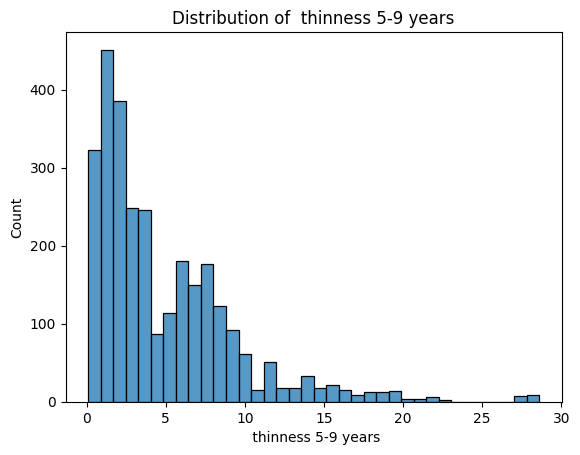

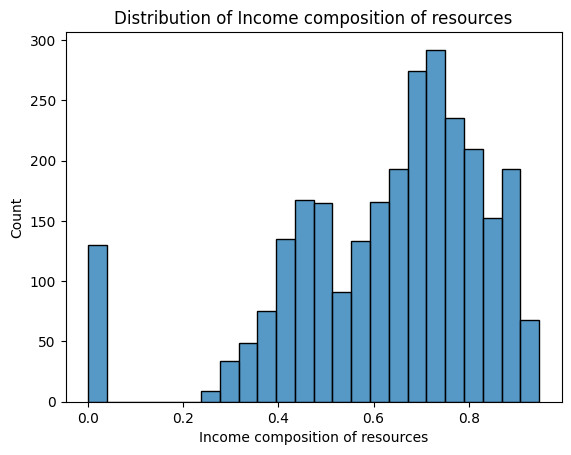

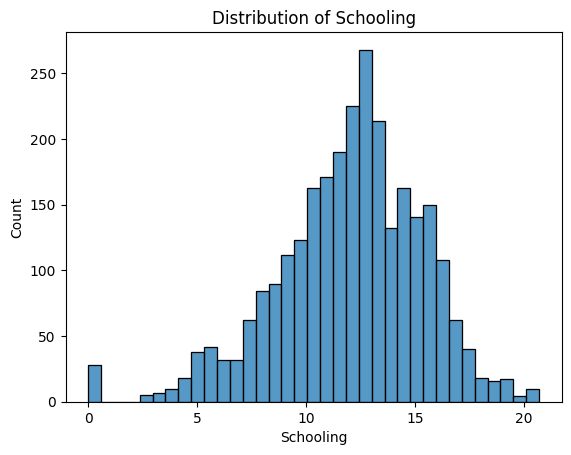

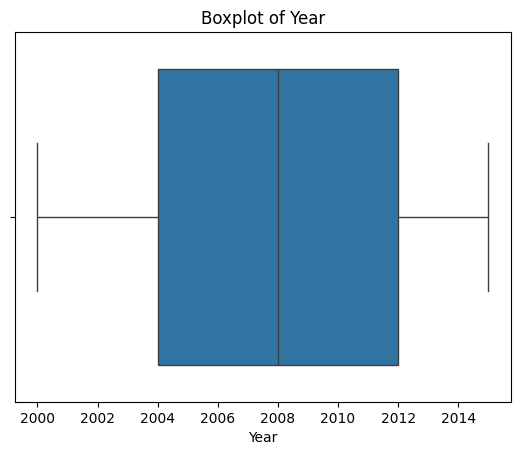

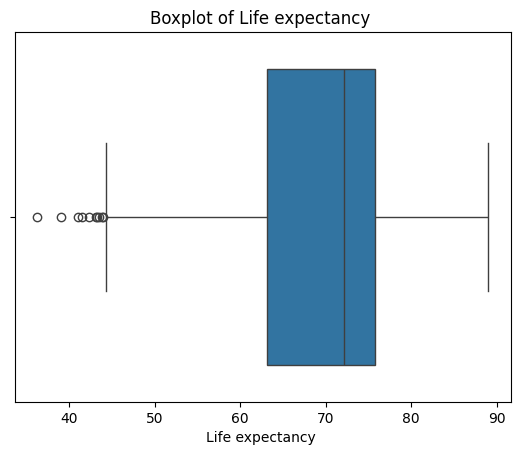

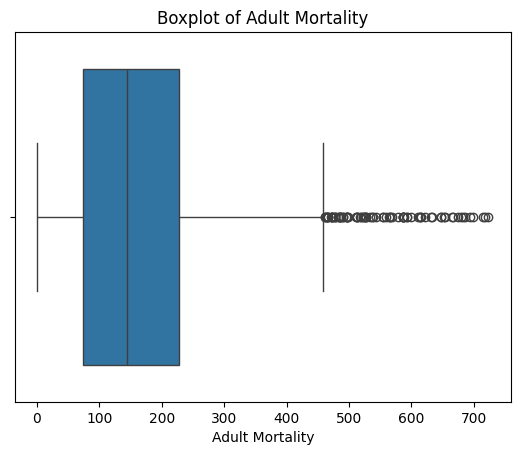

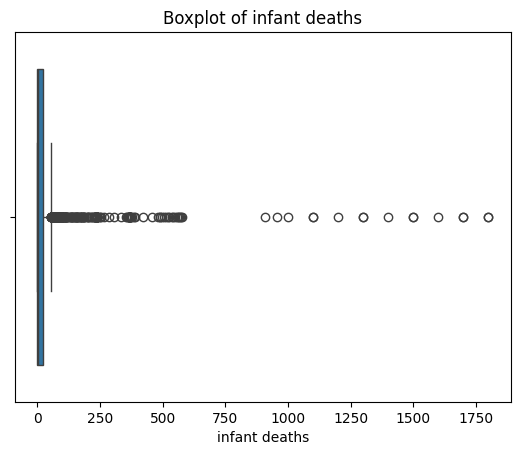

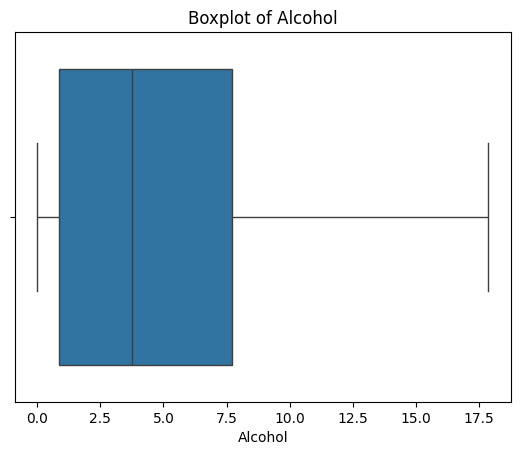

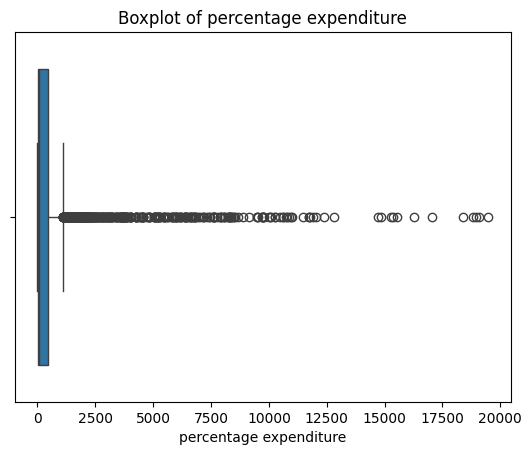

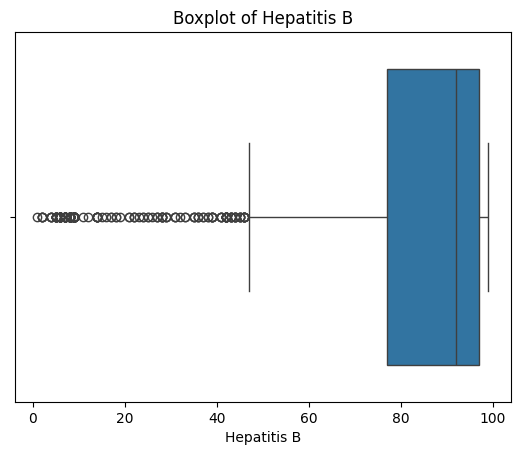

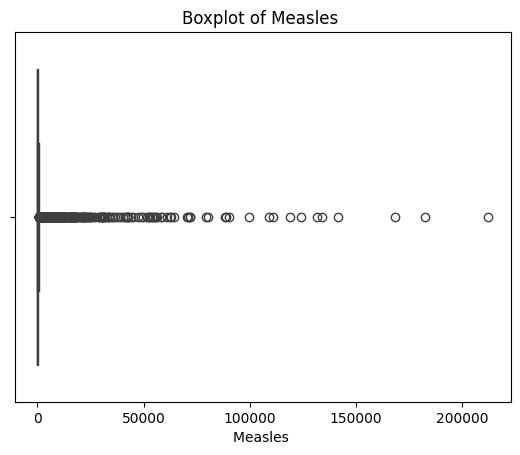

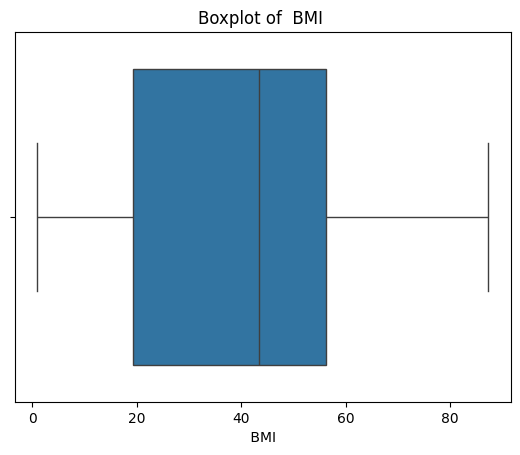

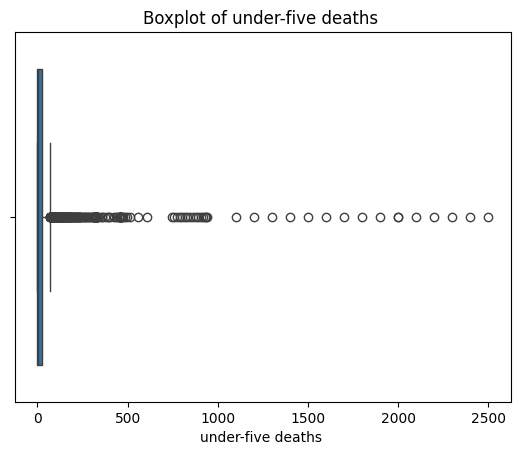

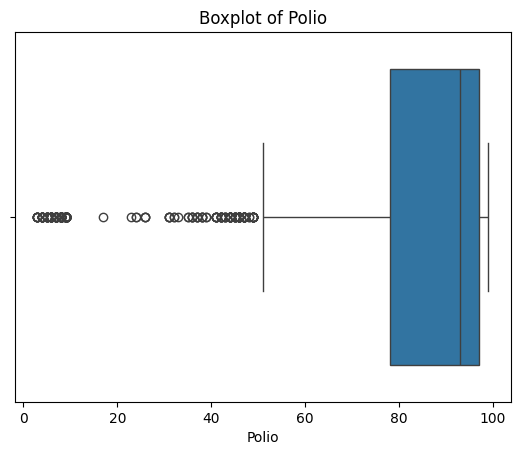

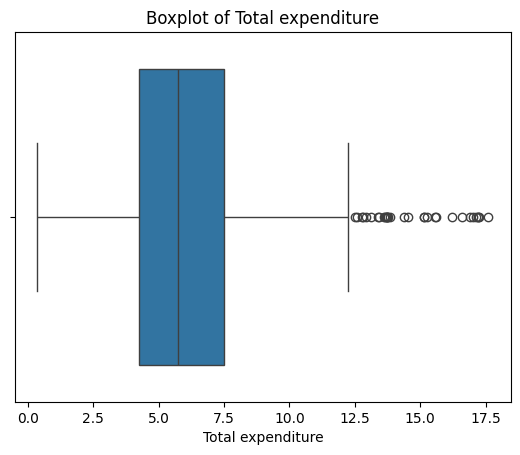

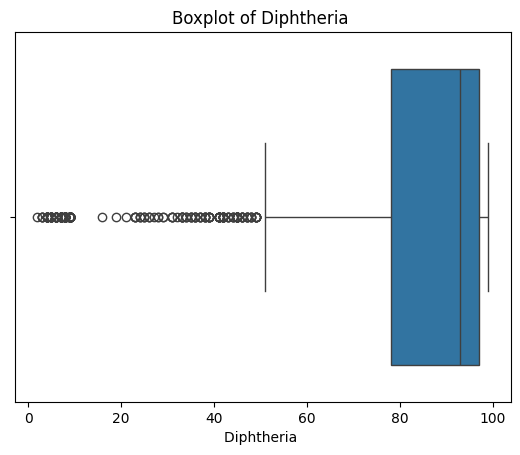

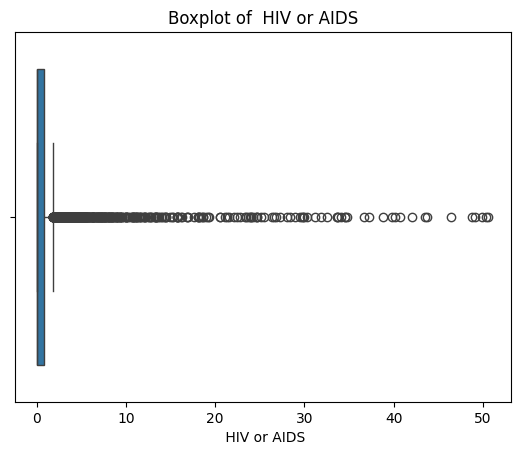

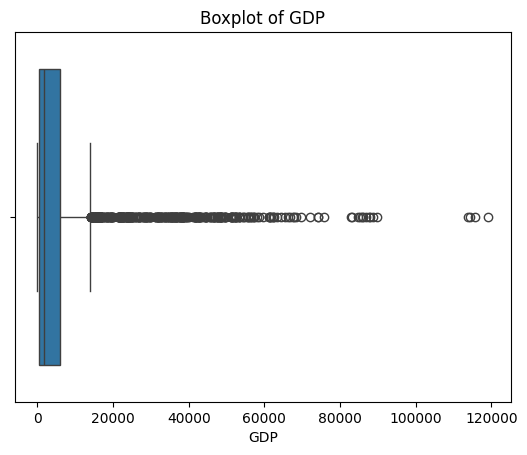

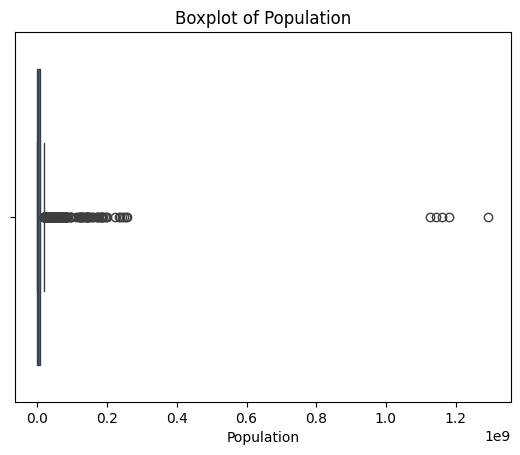

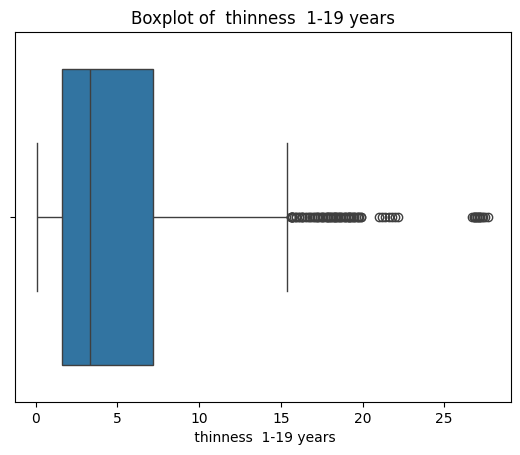

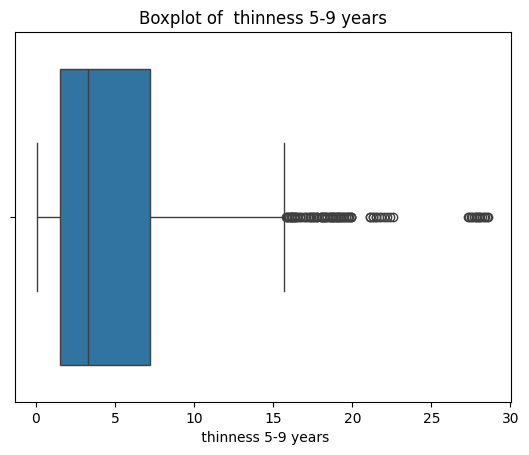

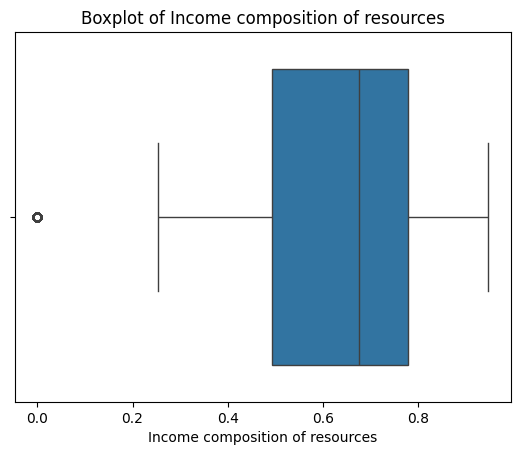

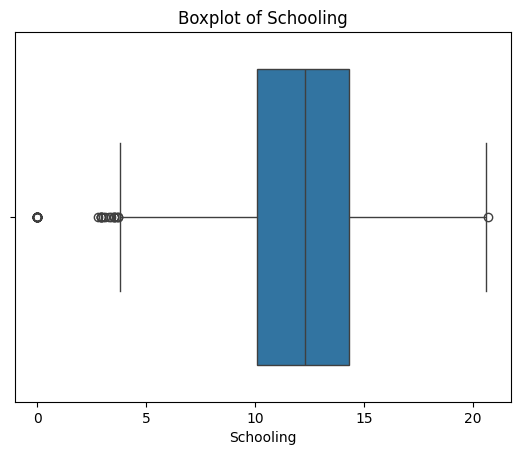

In [7]:
# Histogram for numerical columns
for col in df.select_dtypes(include="number").columns:
    sns.histplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

# Boxplot for numerical columns to identify outliers
for col in ['Year','Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV or AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']:
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

## Scatter Plots
We create scatter plots to understand relationships between various features and life expectancy.

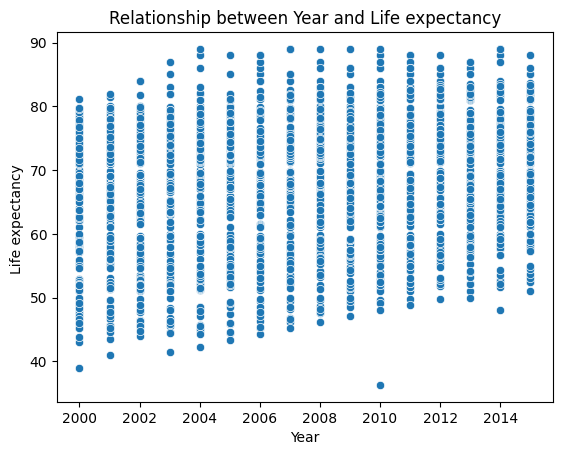

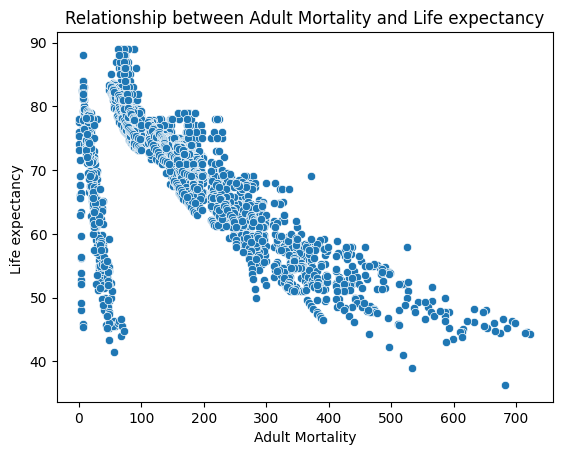

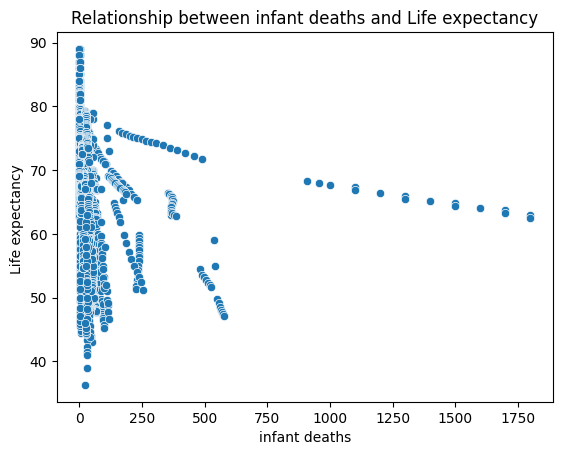

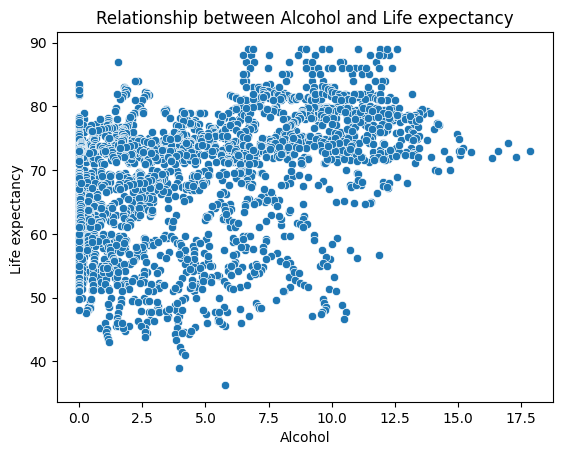

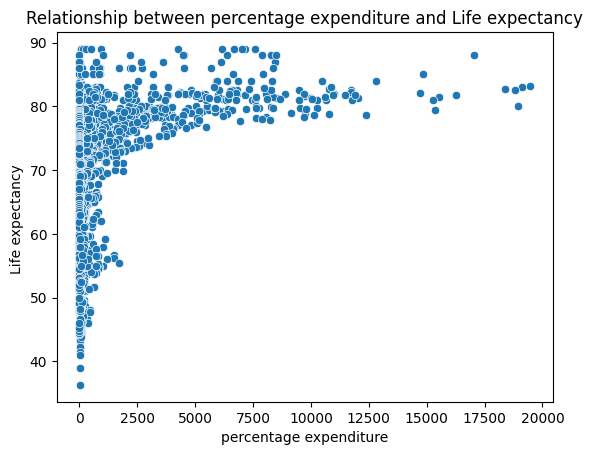

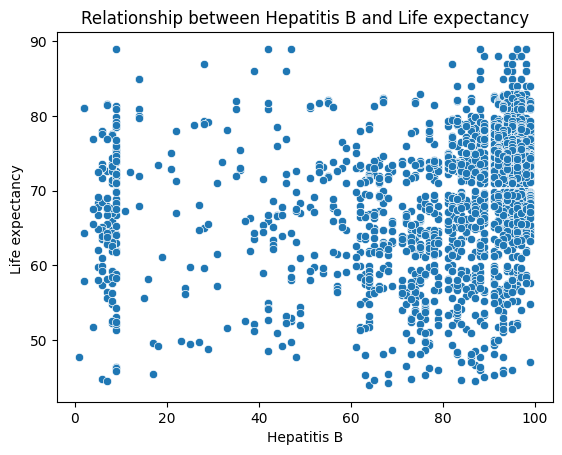

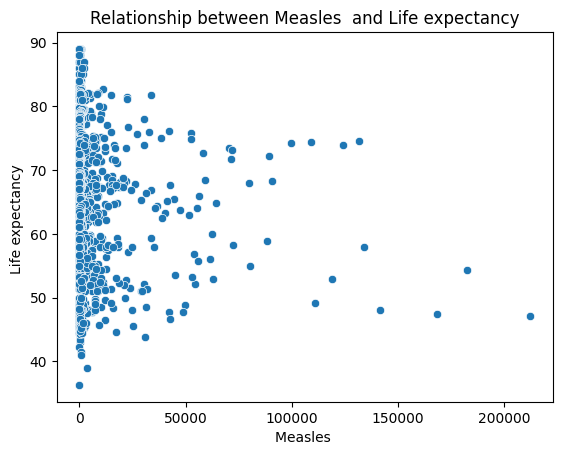

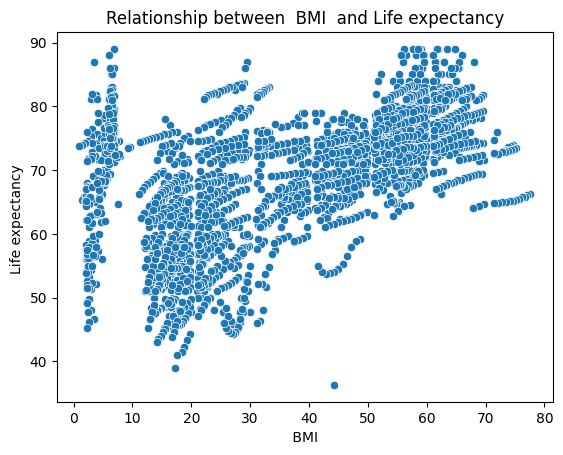

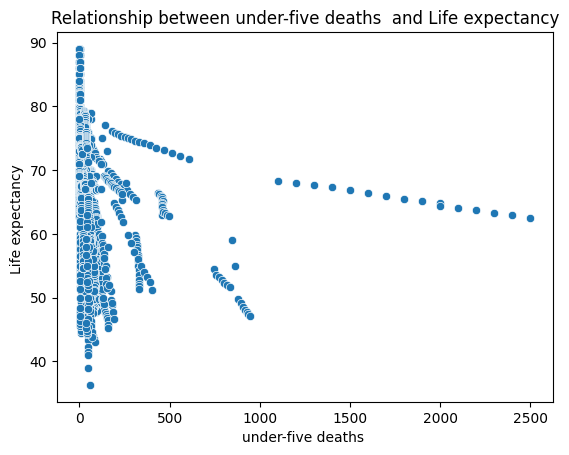

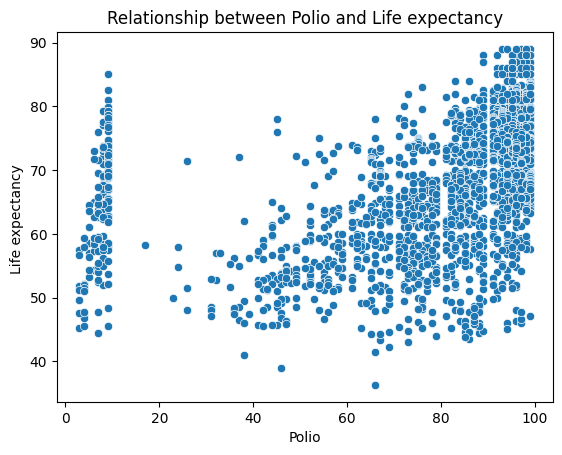

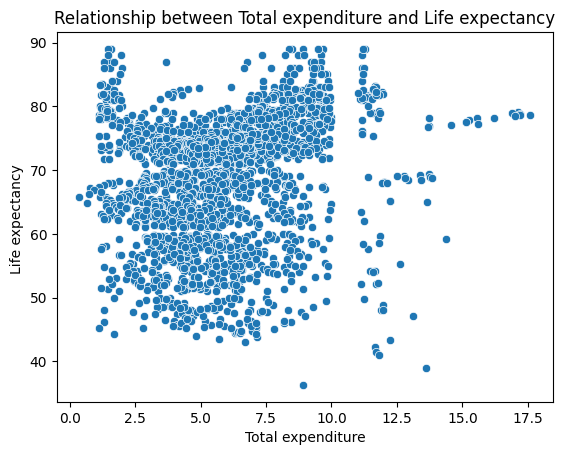

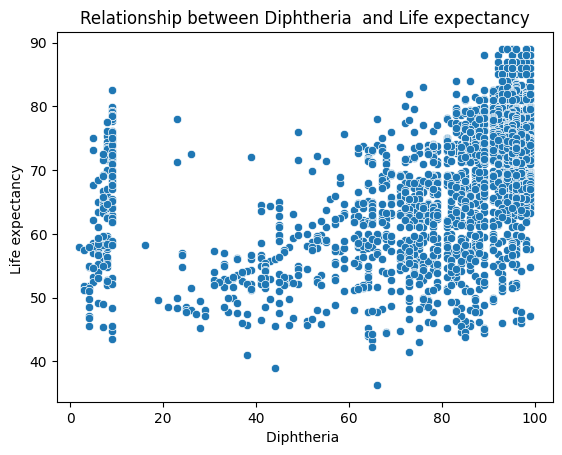

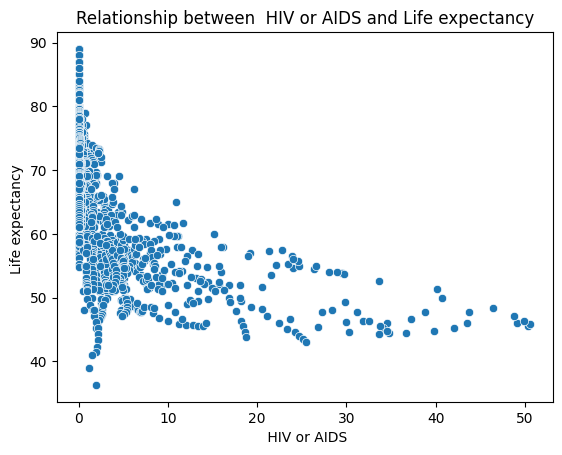

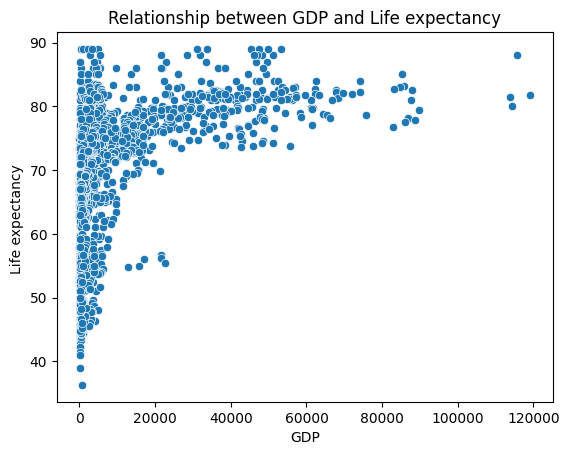

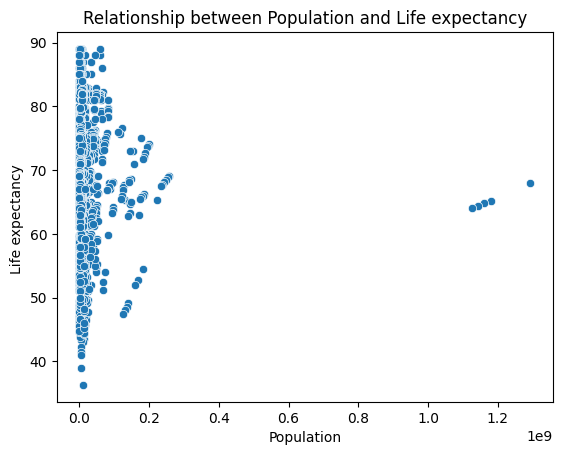

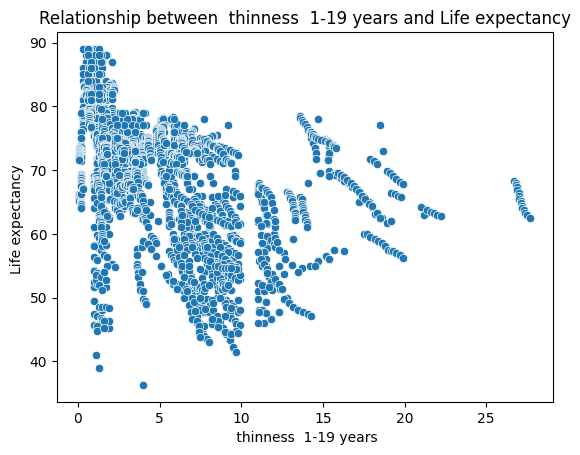

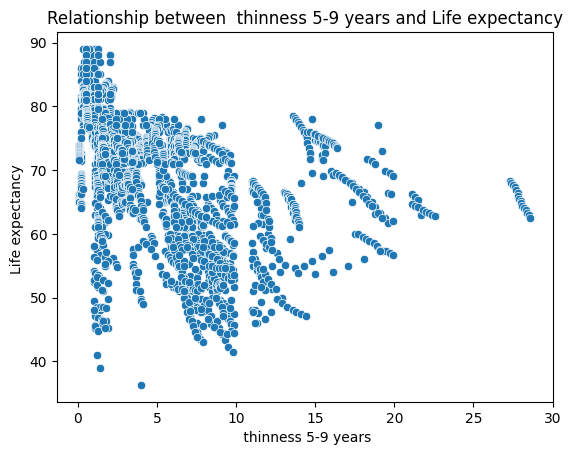

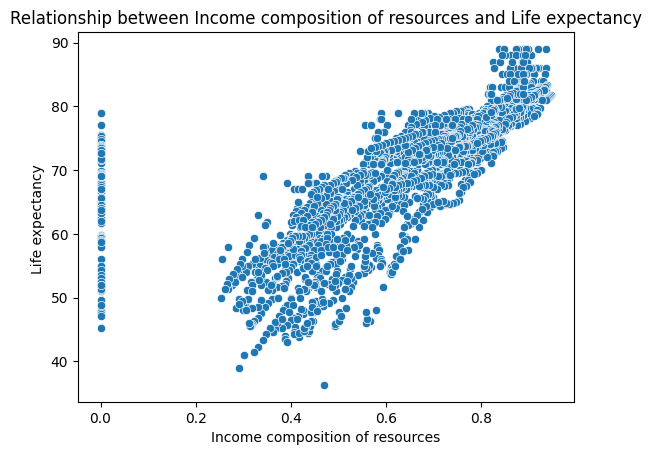

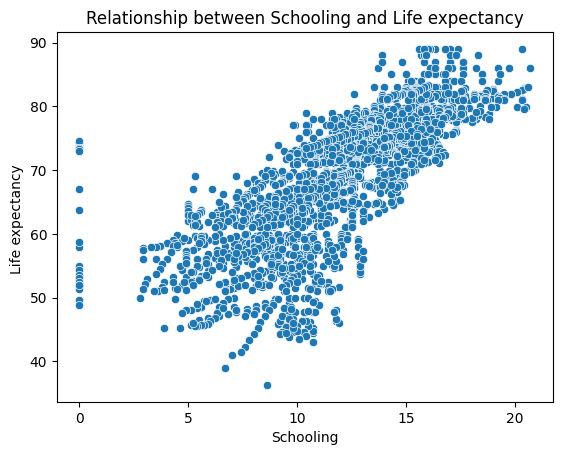

In [9]:
# Scatter plots to understand relationships with Life Expectancy
for col in ['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV or AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']:
    sns.scatterplot(data=df, x=col, y='Life expectancy ')
    plt.title(f'Relationship between {col} and Life expectancy')
    plt.show()

## Correlation Heatmap
We visualize the correlations between numerical variables using a heatmap.

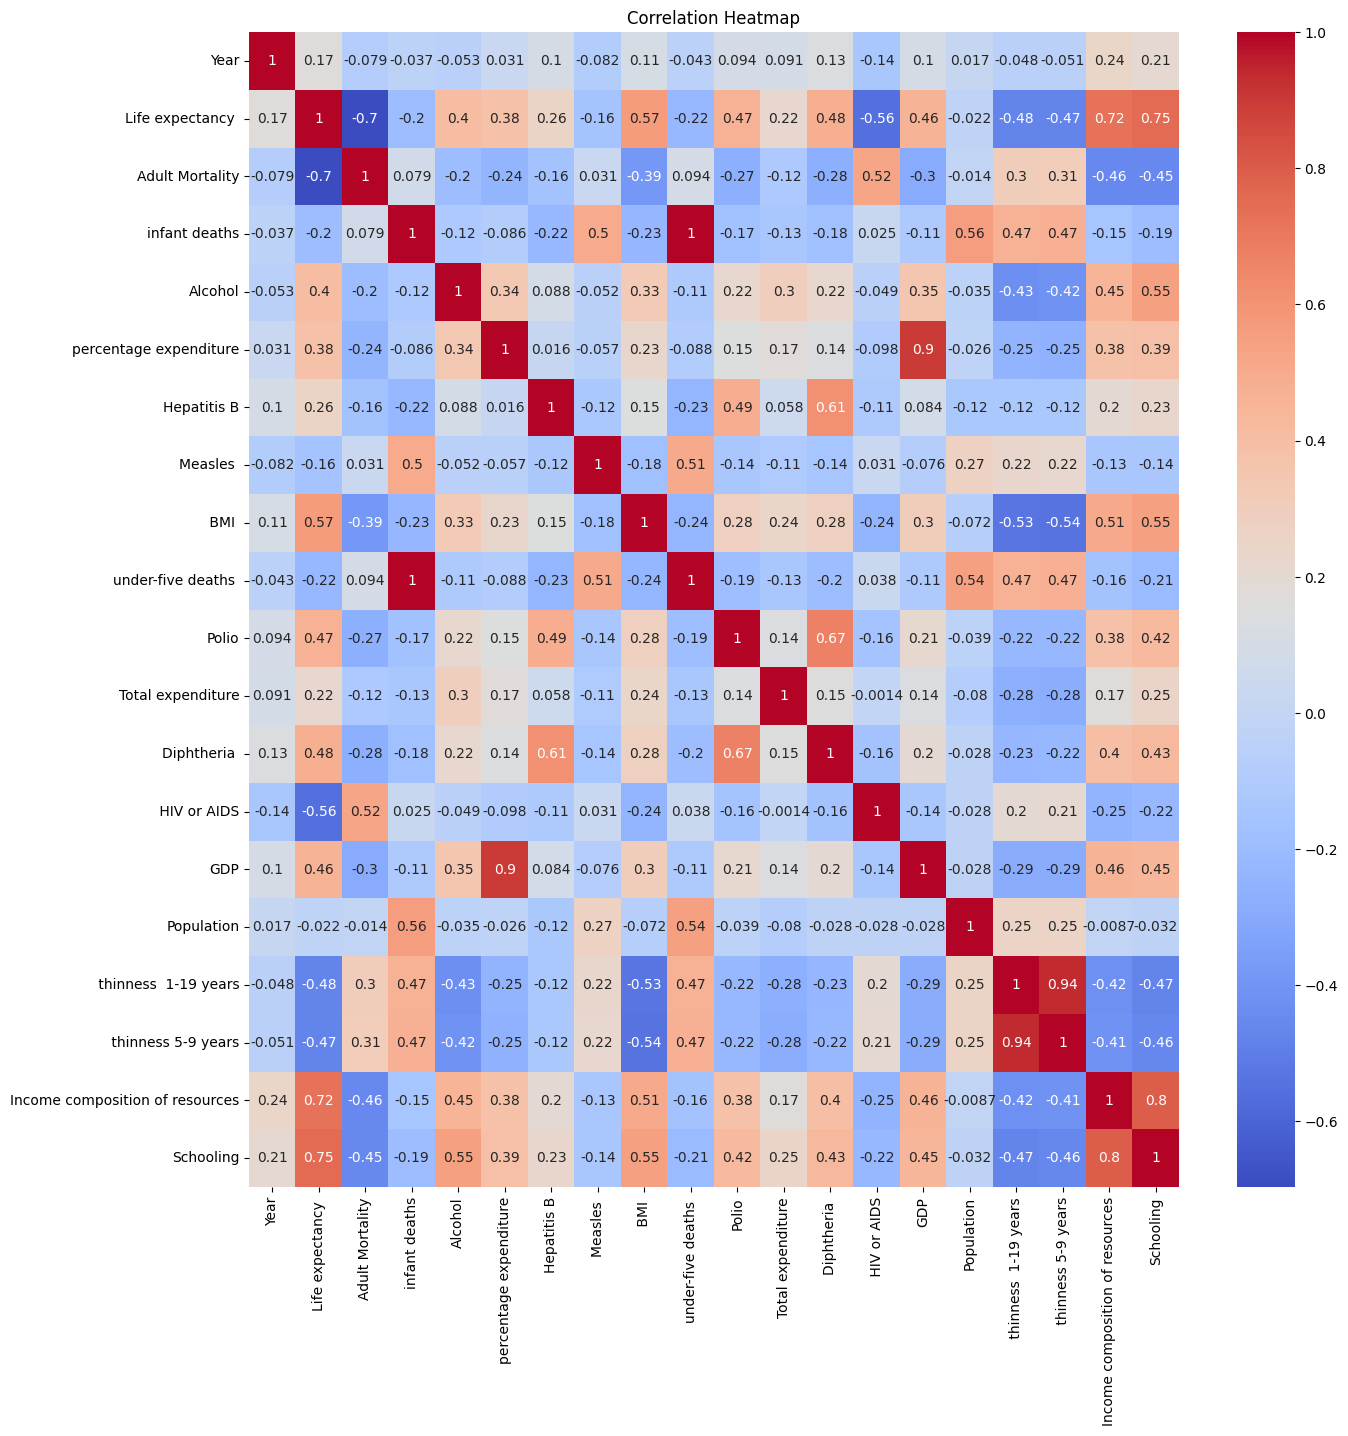

In [10]:
# Correlation heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Handle Missing Values
We handle missing values in numerical columns using KNNImputer and use median for specific columns.


In [11]:
from sklearn.impute import KNNImputer

# Handling missing values with KNNImputer for numerical columns
imputer = KNNImputer()
df[df.select_dtypes(include="number").columns] = imputer.fit_transform(df.select_dtypes(include="number"))

# Specific columns handled differently
for col in ["Polio", "Income composition of resources"]:
    df[col].fillna(df[col].median(), inplace=True)

# Confirm no missing values remain
print(df.isnull().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV or AIDS                       0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


## Outlier Detection and Treatment
We detect and treat outliers using the whisker method.


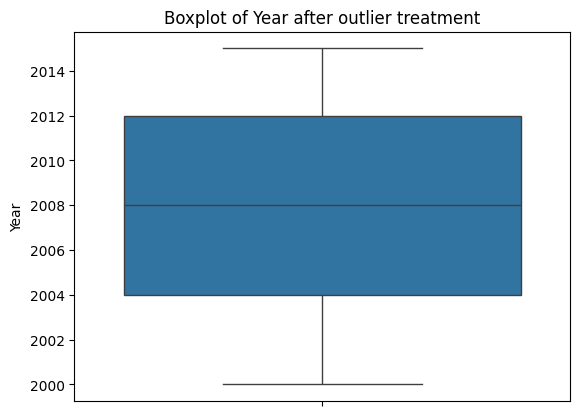

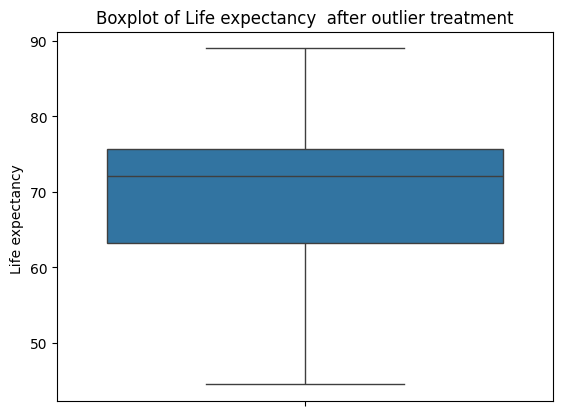

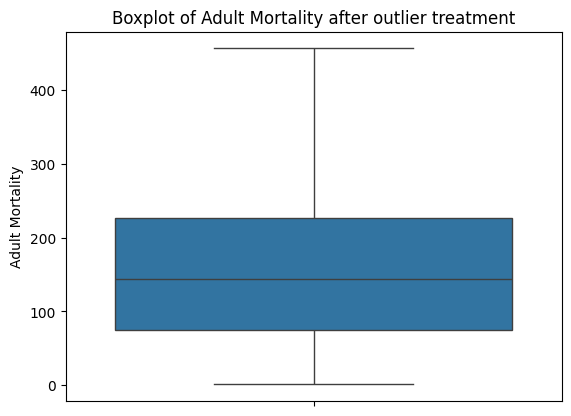

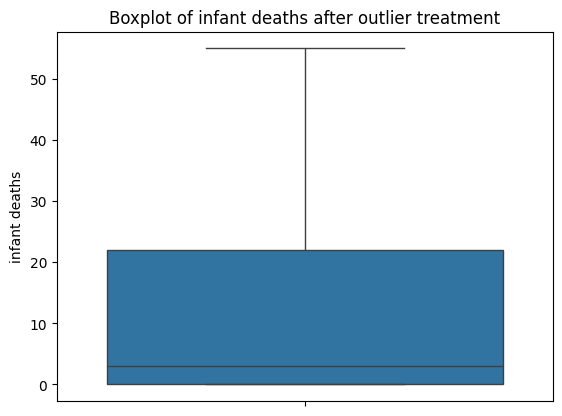

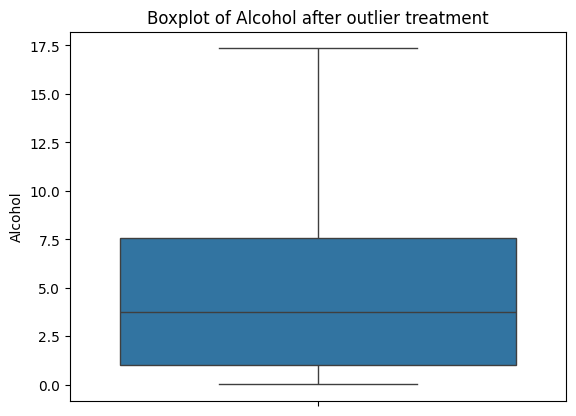

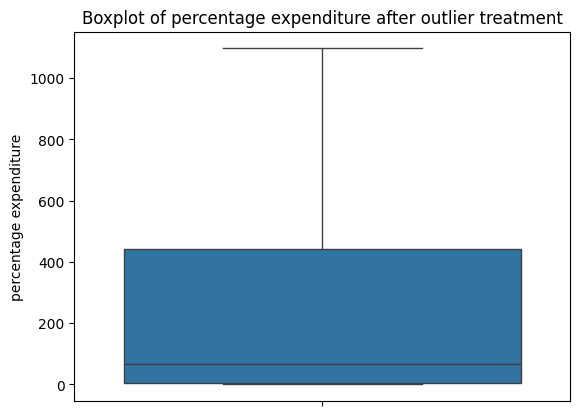

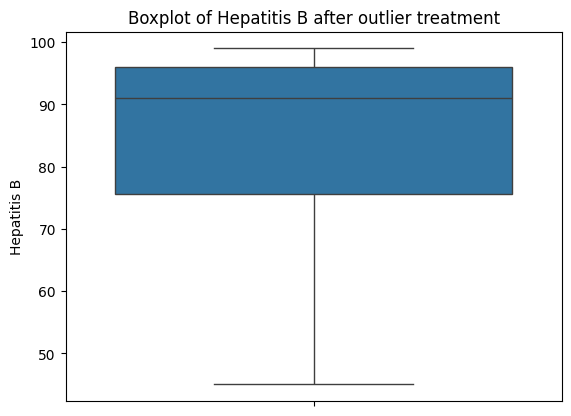

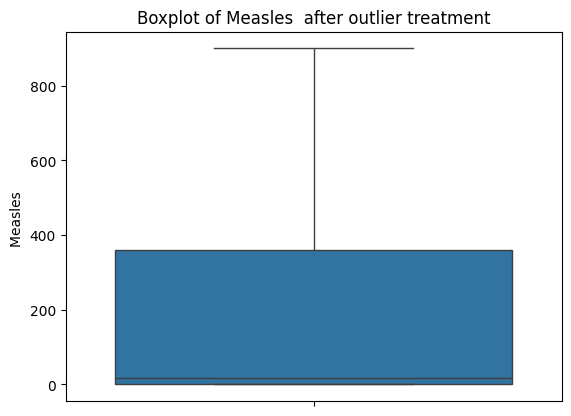

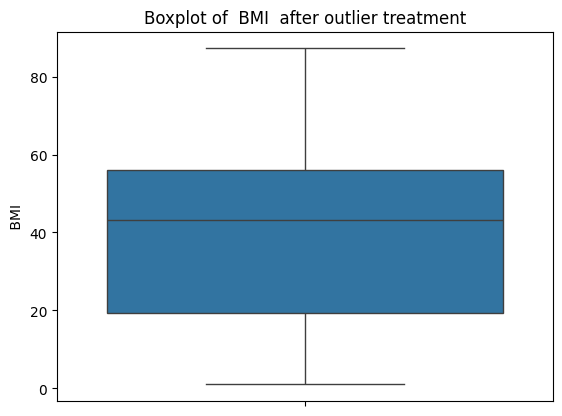

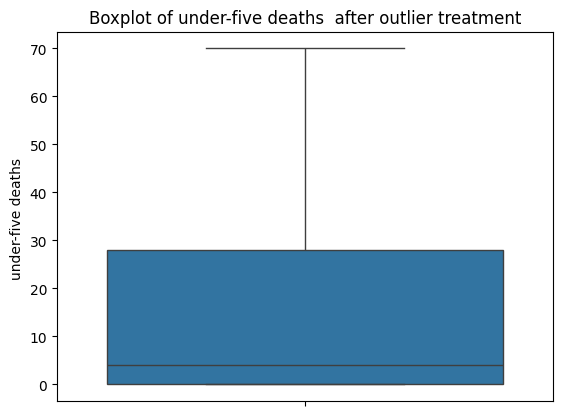

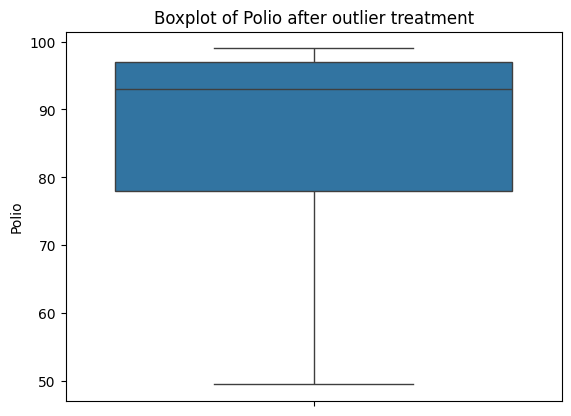

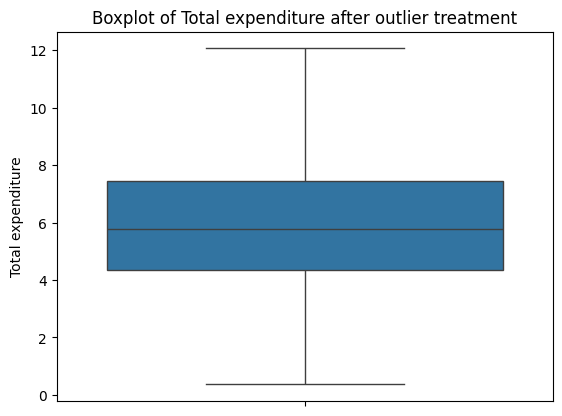

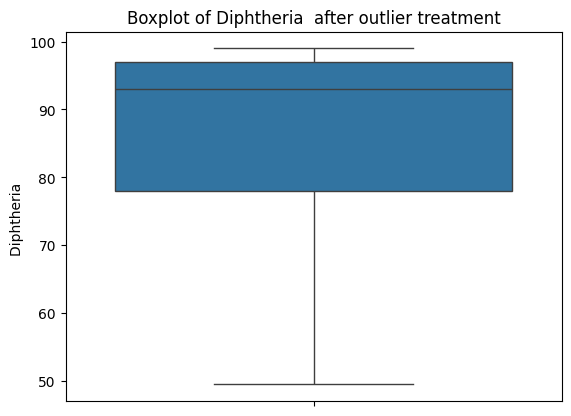

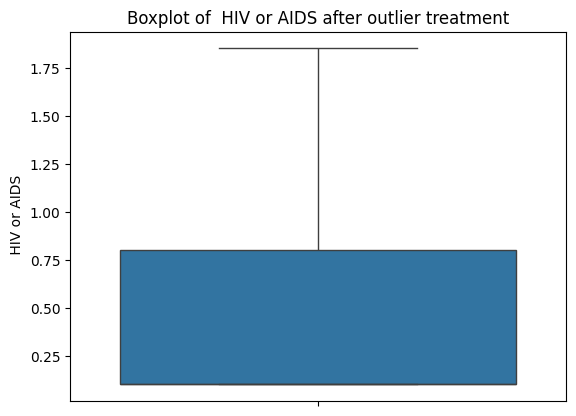

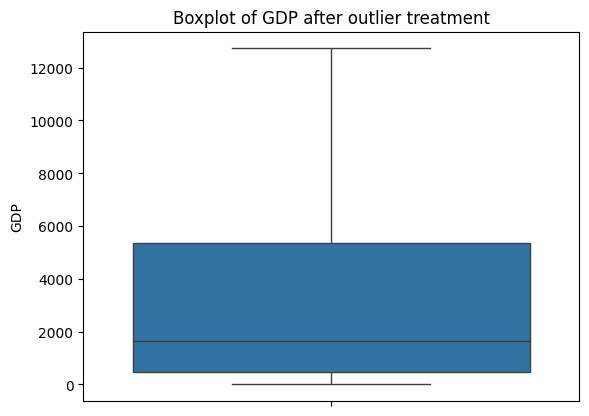

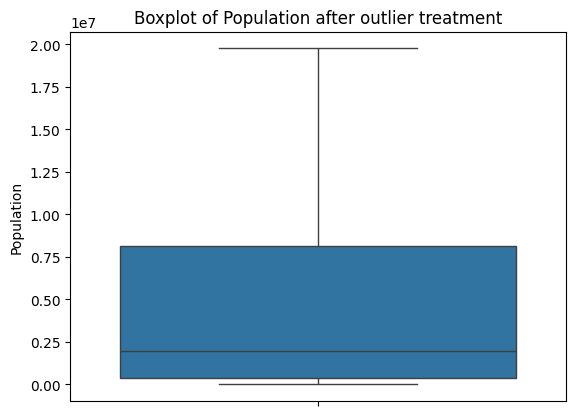

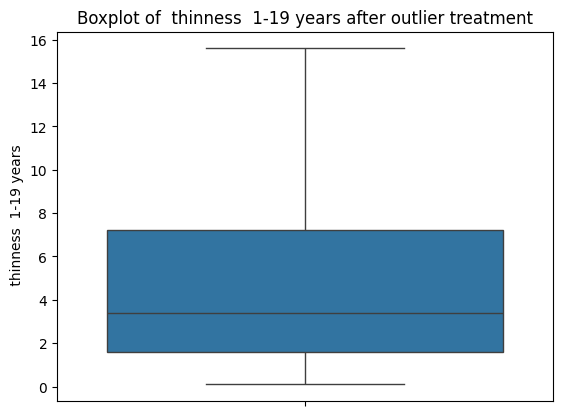

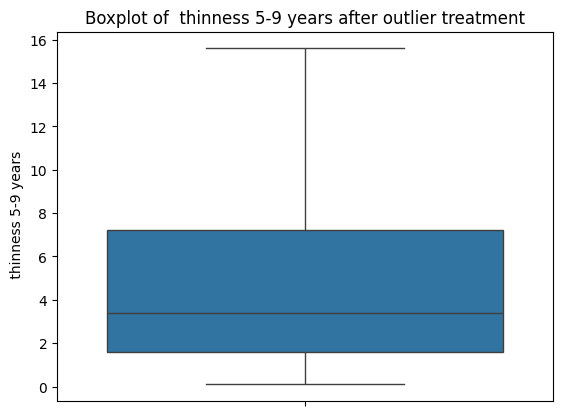

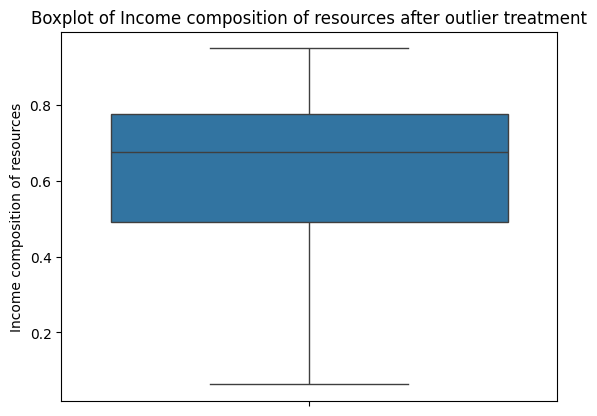

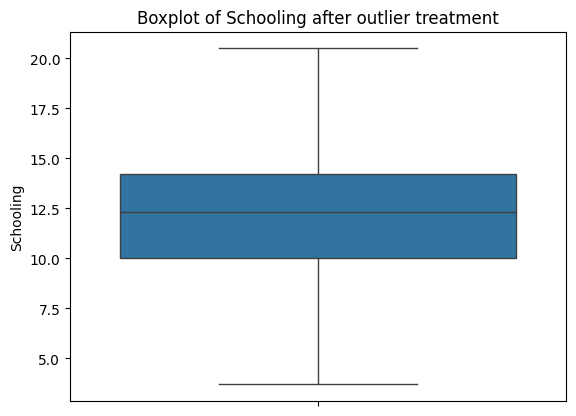

In [12]:
# Outlier detection and treatment using whisker method
def whisker(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return lower_bound, upper_bound

for col in ['Year','Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV or AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']:
    lower, upper = whisker(df[col])
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

# Visualize boxplots again to check outliers after treatment
for col in ['Year','Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV or AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']:
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col} after outlier treatment')
    plt.show()

## Encode Categorical Variables
We perform one-hot encoding on categorical variables.


In [14]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical variables
categorical_features = ['Country']
df = pd.get_dummies(df, columns=categorical_features)

# Label encoding for 'Status' column
label_encoder = LabelEncoder()
if 'Status' in df.columns:
    df['Status'] = label_encoder.fit_transform(df['Status'])

## Normalize Numerical Columns
We normalize numerical columns to scale the data.


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[df.select_dtypes(include='number').columns] = scaler.fit_transform(df[df.select_dtypes(include='number').columns])

## Final Dataset Overview
We review the shape and first few rows of the cleaned and processed dataset.


In [16]:
# Shape of the dataset after encoding
print(f'Shape of the dataset after encoding: {df.shape}')

# Print first few rows to check
print(df.head())

Shape of the dataset after encoding: (2938, 214)
       Year  Status  Life expectancy   Adult Mortality  infant deaths  \
0  1.000000     1.0          0.460826         0.575192            1.0   
1  0.933333     1.0          0.346251         0.592755            1.0   
2  0.866667     1.0          0.346251         0.586169            1.0   
3  0.800000     1.0          0.337265         0.594951            1.0   
4  0.733333     1.0          0.330525         0.601537            1.0   

   Alcohol  percentage expenditure  Hepatitis B  Measles       BMI   ...  \
0      0.0                0.064988     0.370370  1.000000  0.209733  ...   
1      0.0                0.067034     0.314815  0.546287  0.203940  ...   
2      0.0                0.066757     0.351852  0.477446  0.198146  ...   
3      0.0                0.071283     0.407407  1.000000  0.192352  ...   
4      0.0                0.006471     0.425926  1.000000  0.187717  ...   

   Country_United Republic of Tanzania  Country_United 

# Data Analysis and Clustering with K-Means and DBSCAN
This notebook performs clustering on a dataset using K-Means and DBSCAN algorithms. It also applies Linear Regression, Random Forest Regression, and Gradient Boosting Regression to predict a target variable.

In [17]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Applying PCA to reduce dimensionality for Visualization

In [18]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)
df['pca_one'] = pca_result[:, 0]
df['pca_two'] = pca_result[:, 1]

## Using the elbow method to find the optimal number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

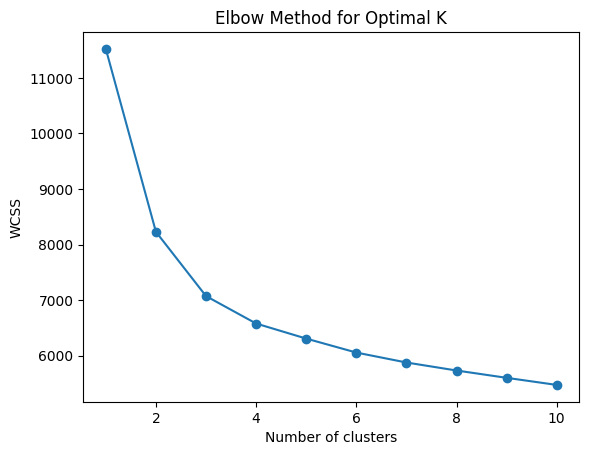

In [19]:
# Elbow method
wcss = [KMeans(n_clusters=i, random_state=42).fit(df).inertia_ for i in range(1, 11)]
fig, ax = plt.subplots()
ax.plot(range(1, 11), wcss, marker='o')
ax.set_title('Elbow Method for Optimal K')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
plt.show()

## K-Means Clustering
We will perform K-Means clustering with 3 clusters and visualize the results.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'K-Means Clustering Results')

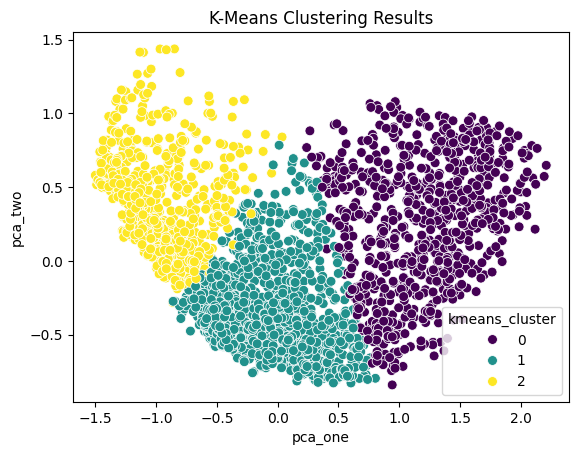

In [20]:
#K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(df)
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='pca_one', y='pca_two', hue='kmeans_cluster', palette='viridis', s=50, ax=ax)
ax.set_title('K-Means Clustering Results')

## DBSCAN Clustering
We will perform DBSCAN clustering and visualize the results.

Text(0.5, 1.0, 'DBSCAN Clustering Results')

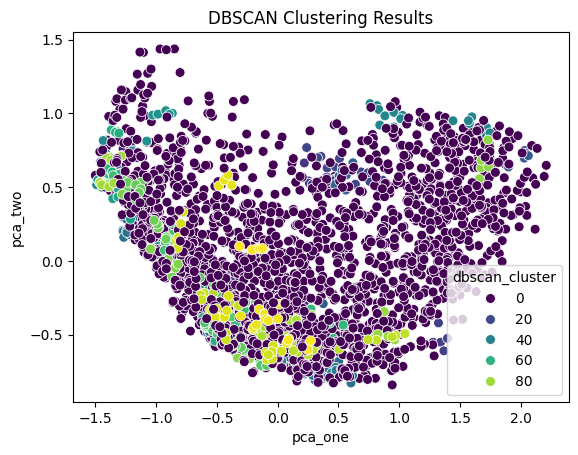

In [21]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(df)
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='pca_one', y='pca_two', hue='dbscan_cluster', palette='viridis', s=50, ax=ax)
ax.set_title('DBSCAN Clustering Results')

## Linear Regression
We will apply linear regression to predict 'Life expectancy' and calculate performance metrics

In [22]:
# Importing required libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Prepare data for regression
X = df.drop(columns=['Life expectancy '])
y = df['Life expectancy ']

# Apply Linear Regression
linreg = LinearRegression()
linreg.fit(X, y)
y_pred = linreg.predict(X)

linreg_rmse = mean_squared_error(y, y_pred, squared=False)
linreg_r2 = r2_score(y, y_pred)
linreg_mae = mean_absolute_error(y, y_pred)


## Random Forest Regression
We will apply random forest regression, calculate performance metrics, and plot the results.

Text(0, 0.5, 'Predicted')

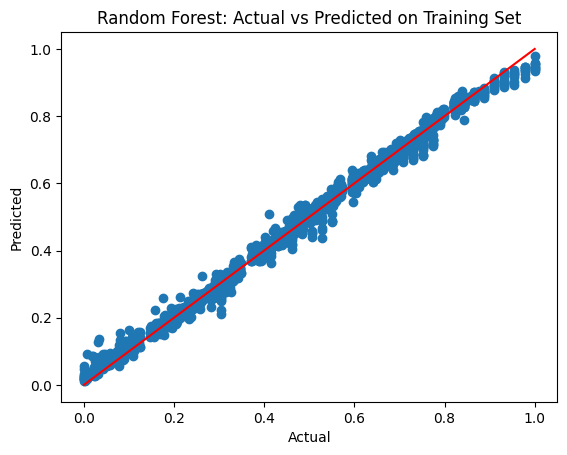

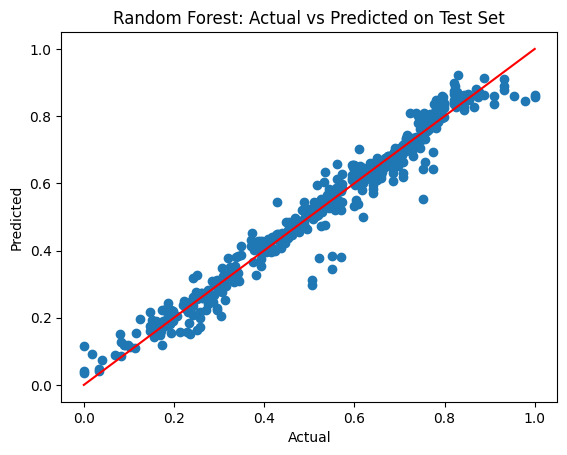

In [23]:
#importing required libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Apply Random Forest Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rforest = RandomForestRegressor(random_state=42)
rforest.fit(X_train, y_train)
y_pred_train = rforest.predict(X_train)
y_pred_test = rforest.predict(X_test)

rforest_train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
rforest_test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
rforest_train_r2 = r2_score(y_train, y_pred_train)
rforest_test_r2 = r2_score(y_test, y_pred_test)
rforest_train_mae = mean_absolute_error(y_train, y_pred_train)
rforest_test_mae = mean_absolute_error(y_test, y_pred_test)

# Plot Random Forest results for training set
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred_train)
ax.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')
ax.set_title('Random Forest: Actual vs Predicted on Training Set')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

# Plot Random Forest results for test set
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_test)
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
ax.set_title('Random Forest: Actual vs Predicted on Test Set')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')


## Gradient Boosting Regression
We will apply gradient boosting regression, calculate performance metrics, and plot the results.

Text(0, 0.5, 'Predicted')

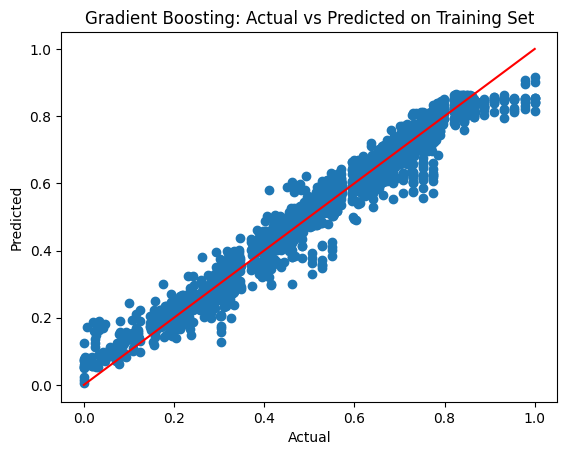

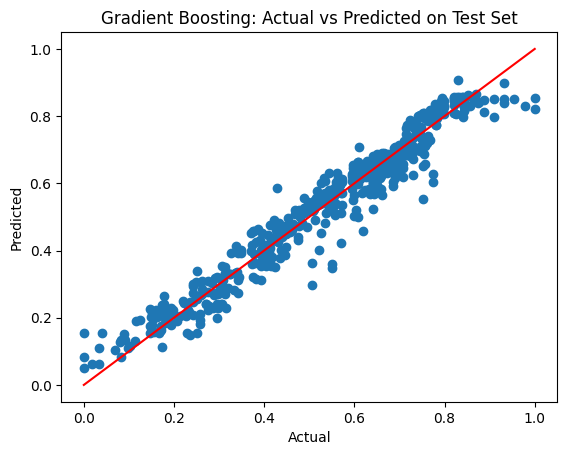

In [24]:
#importing required libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Apply Gradient Boosting Regression
gbm = GradientBoostingRegressor(random_state=42)
gbm.fit(X_train, y_train)
y_pred_train_gbm = gbm.predict(X_train)
y_pred_test_gbm = gbm.predict(X_test)

gbm_train_rmse = mean_squared_error(y_train, y_pred_train_gbm, squared=False)
gbm_test_rmse = mean_squared_error(y_test, y_pred_test_gbm, squared=False)
gbm_train_r2 = r2_score(y_train, y_pred_train_gbm)
gbm_test_r2 = r2_score(y_test, y_pred_test_gbm)
gbm_train_mae = mean_absolute_error(y_train, y_pred_train_gbm)
gbm_test_mae = mean_absolute_error(y_test, y_pred_test_gbm)

# Plot Gradient Boosting results for training set
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred_train_gbm)
ax.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')
ax.set_title('Gradient Boosting: Actual vs Predicted on Training Set')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

# Plot Gradient Boosting results for test set
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_test_gbm)
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
ax.set_title('Gradient Boosting: Actual vs Predicted on Test Set')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

## Natural Language Generation
We will use a summarization model to generate summaries for the regression model metrics.

In [29]:
#importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming 'df' is already loaded or processed in your notebook environment
# Replace 'df' with your actual DataFrame

# Split the data into features and target
X = df.drop('Life expectancy ', axis=1)
y = df['Life expectancy ']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest model
model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)

# Calculate feature importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)

# Display results
mae_test, mse_test, importance_df



(0.02540334538757937,
 0.0015446919317990881,
                              Feature    Importance
 13                       HIV or AIDS  4.051969e-01
 213                          pca_one  2.340019e-01
 18   Income composition of resources  1.620216e-01
 2                    Adult Mortality  1.110628e-01
 19                         Schooling  1.175911e-02
 ..                               ...           ...
 125         Country_Marshall Islands  2.594565e-08
 69                  Country_Dominica  6.313419e-09
 137                    Country_Nauru  2.359815e-10
 198                   Country_Tuvalu  0.000000e+00
 166               Country_San Marino  0.000000e+00
 
 [217 rows x 2 columns])